### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import operator
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import inaugural, stopwords
from wordcloud import WordCloud, STOPWORDS 

### Function to calculate percentages of words and print frequencies and percentages

In [2]:
def perc(d):
    perc = {}
    for key, value in d.items():
        newvalue = round(value/len(preprocessed_text)*100, 2)
        perc[key]= newvalue
        print(str(key)+','+str(value)+','+str(newvalue)+','+' ,')
    #print(perc)

### Removing the numbers and splitting the data into words(containing only letters)

In [3]:
df = pd.read_csv('RNA.csv')
#print(df.head(5))
x10 = df['title..4'].values
x11 = df['description'].values

df2 = pd.read_csv('Microarray.csv')
#print(df.head(5))
x20 = df2['title..4'].values
x21 = df2['description'].values

x = np.concatenate((x10,x11,x20,x21))
print(len(x))

#print(x[:10], sep = ',')

pattern_to_find1 = "[^a-zA-Z0-9 ]"
pattern_to_repl1 = " "
pattern_to_find2 = "[^a-zA-Z ]";
pattern_to_repl2 = ""

preprocessed_text = []
total_string_labels = ''
for sample in x:
    try:
        pre_txt = re.sub(pattern_to_find1, pattern_to_repl1, sample)
        pre_txt = re.sub(pattern_to_find2, pattern_to_repl2, pre_txt).lower()
        total_string_labels+=pre_txt
    #     print(pre_txt.strip())
        preprocessed_text.extend(pre_txt.strip().split())
    except:
        continue    

3592300


### Removing stopwords

In [4]:
sw = stopwords.words('english')
preprocessed_text = [w for w in preprocessed_text if w not in sw]
        
#preprocessed_text = [x for x in preprocessed_text if len(x)!=1]/
print(len(preprocessed_text))
print('')

22720652



### Calculating frequencies of words in the list

In [5]:
# print(total_string_labels)

counts = Counter(preprocessed_text)
print(len(counts))
#print(counts)
print('')

95097



### Keeping only words with freq > 100 and splitting it into 1, 2, 3, >3 lettered labels 

In [6]:
# 
d_100 = dict((k, v) for k, v in counts.items() if v >= 100)
sorted_d_100 = dict( sorted(d_100.items(), key=operator.itemgetter(1),reverse=True))
#perc_d_100 = dict((k, (v/len(preprocessed_text)*100) ) for k, v in sorted_d_100)
print(len(sorted_d_100))
#print(sorted_d_100)    
#perc(sorted_d_100)

sorted_d_100_single = dict((k,v) for k, v in sorted_d_100.items() if len(k) == 1)
print('1 letter ', len(sorted_d_100_single))
#print(sorted_d_100_single)
#perc(sorted_d_100_single)

sorted_d_100_double = dict((k,v) for k, v in sorted_d_100.items() if len(k) == 2)
print('2 letters ', len(sorted_d_100_double))
#print(sorted_d_100_double)
#perc(sorted_d_100_double)

sorted_d_100_triple = dict((k,v) for k, v in sorted_d_100.items() if len(k) == 3)
print('3 letters ', len(sorted_d_100_triple))
#print(sorted_d_100_triple)
#perc(sorted_d_100_triple)

sorted_d_100_more = dict((k,v) for k, v in sorted_d_100.items() if len(k) > 3)
print('more than 3 letters ', len(sorted_d_100_more))
#print(sorted_d_100_more)
#perc(sorted_d_100_more)

11679
1 letter  18
2 letters  556
3 letters  2227
more than 3 letters  8878


### Keeping only words with freq > 300 and splitting it into 1, 2, 3, >3 lettered labels

In [7]:
print('')

d_300 = dict((k, v) for k, v in counts.items() if v >= 300)
sorted_d_300 = dict( sorted(d_300.items(), key=operator.itemgetter(1),reverse=True))
print(len(sorted_d_300))
#print(sorted_d_300)
#perc(sorted_d_300)

sorted_d_300_single = dict((k,v) for k, v in sorted_d_300.items() if len(k) == 1)
print('1 letter ', len(sorted_d_300_single))
#print(sorted_d_300_single)
#perc(sorted_d_300_single)

sorted_d_300_double = dict((k,v) for k, v in sorted_d_300.items() if len(k) == 2)
print('2 letters ', len(sorted_d_300_double))
#print(sorted_d_300_double)
#perc(sorted_d_300_double)

sorted_d_300_triple = dict((k,v) for k, v in sorted_d_300.items() if len(k) == 3)
print('3 letters ', len(sorted_d_300_triple))
#print(sorted_d_300_triple)
#perc(sorted_d_300_triple)

sorted_d_300_more = dict((k,v) for k, v in sorted_d_300.items() if len(k) > 3)
print('more than 3 letters ', len(sorted_d_300_more))
#print(sorted_d_300_more)
#perc(sorted_d_300_more)


6122
1 letter  18
2 letters  448
3 letters  1011
more than 3 letters  4645


### Summary

Total number of samples = 3592300


Total number of words generated = 22720652


Total number of labels = 95097


Total number of labels with frequency > 100 = 11679 (Entire list alongwith percentages with appropriate segregation in comb_tdesc_rep(freq>100).csv)

1 letter labels = 18 <br />
2 letters labels = 556 <br />
3 letters  labels = 2227 <br />
more than 3 letters labels = 8878 <br />


Total number of labels with frequency > 300 = 6122 (Entire list alongwith percentages with appropriate segregation in comb_tdesc_rep(freq>300).csv)

1 letter labels = 18 <br />
2 letters labels = 448 <br />
3 letters  1011 <br />
more than 3 letters labels = 4645 <br />

#### Top 60 words

##### With 1 lettered labels

In [8]:
d_df = pd.DataFrame.from_dict(sorted_d_300, orient='index', columns=['Freq'])
d_df.head(60)

Freq
sample      331903
rep         322519
control     320377
data        310051
expression  285911
gene        276365
rna         235595
cell        216807
h           205604
replicate   200569
cells       197603
na          187115
txt         186479
c           185064
liver       159577
days        146952
e           124338
b           120033
seq         115742
single      114183
biological  112921
p           103276
processed   100494
file         96540
gsm          95386
vehicle      95298
day          88831
cy           88422
matched      87453
counts       86166
treated      84417
using        83723
patient      83246
mm           81481
mouse        81329
human        80679
l            80653
tissue       80510
wt           78001
r            75863
f            75088
cd           69225
blood        69049
n            68861
x            67300
vs           66590
csv          64948
tumor        64817
g            64432
total        57173
samples      54696
gz           52360
hr           51832
treatment    48877
hours        46027
type         45939
experiment   45515
cancer       44288
time         43630
used         42503

##### Without 1 lettered labels

In [9]:
sorted_d_300_w = dict((k, v) for k, v in sorted_d_300.items() if len(k)!=1)
d_df = pd.DataFrame.from_dict(sorted_d_300_w, orient='index', columns=['Freq'])
d_df.head(60)

Freq
sample      331903
rep         322519
control     320377
data        310051
expression  285911
gene        276365
rna         235595
cell        216807
replicate   200569
cells       197603
na          187115
txt         186479
liver       159577
days        146952
seq         115742
single      114183
biological  112921
processed   100494
file         96540
gsm          95386
vehicle      95298
day          88831
cy           88422
matched      87453
counts       86166
treated      84417
using        83723
patient      83246
mm           81481
mouse        81329
human        80679
tissue       80510
wt           78001
cd           69225
blood        69049
vs           66590
csv          64948
tumor        64817
total        57173
samples      54696
gz           52360
hr           51832
treatment    48877
hours        46027
type         45939
experiment   45515
cancer       44288
time         43630
used         42503
ml           42417
mice         42081
http         39963
genes        38643
normal       38513
mrna         37584
microarray   36797
analysis     36725
line         36421
male         36277
id           36193

In [10]:
d_f = d_df.head(60)
print('Sum of top 60 word frequencies: ', d_f['Freq'].sum())

Sum of top 60 word frequencies:  6401728


### Frequency Plots

#### Bar chart : 1 lettered labels

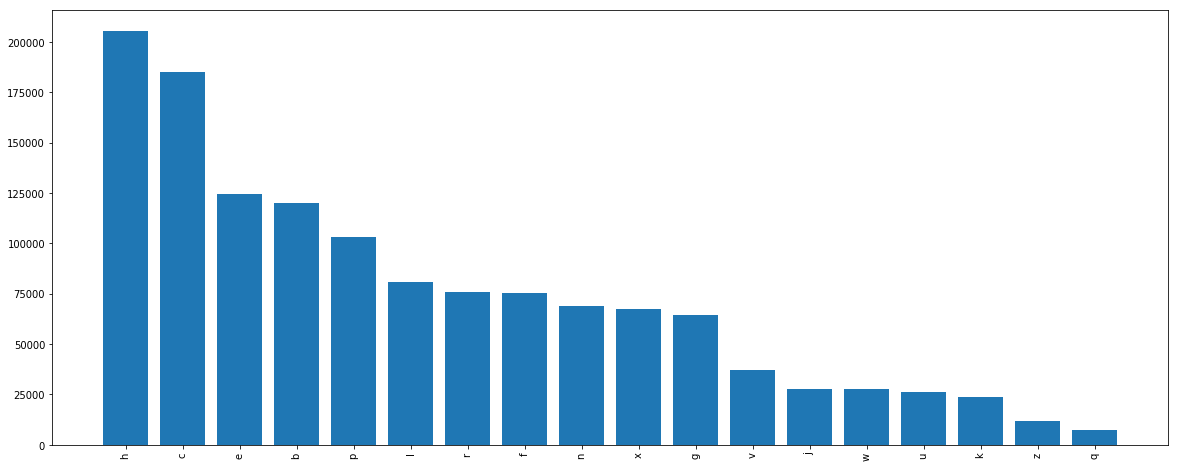

In [11]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(rotation='vertical')
plt.bar(sorted_d_300_single.keys(), sorted_d_300_single.values())

plt.show()

#### Bar chart : 2 lettered labels(top 100)

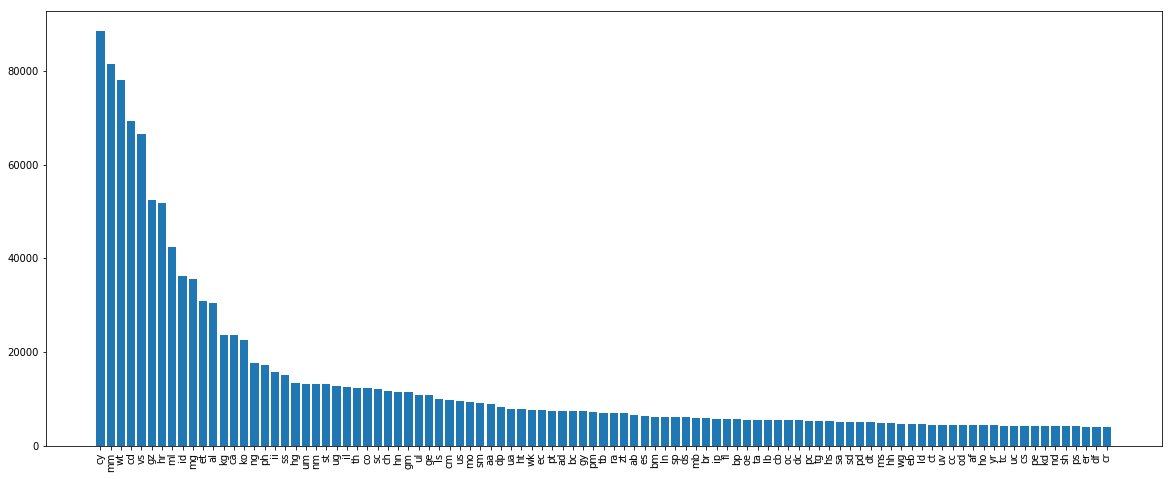

In [12]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(rotation='vertical')
plt.bar(list(sorted_d_300_double.keys())[1:100], list(sorted_d_300_double.values())[1:100])

plt.show()

#### Bar chart : 3 lettered labels(top 100)

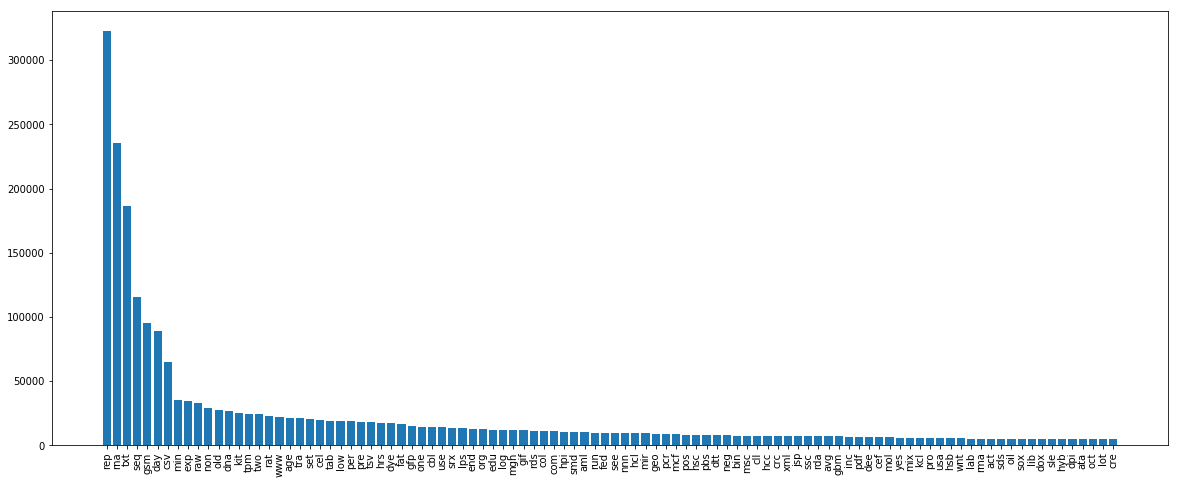

In [13]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(rotation='vertical')
plt.bar(list(sorted_d_300_triple.keys())[:100], list(sorted_d_300_triple.values())[:100])

plt.show()

#### Bar chart : >3 lettered labels(top 100)

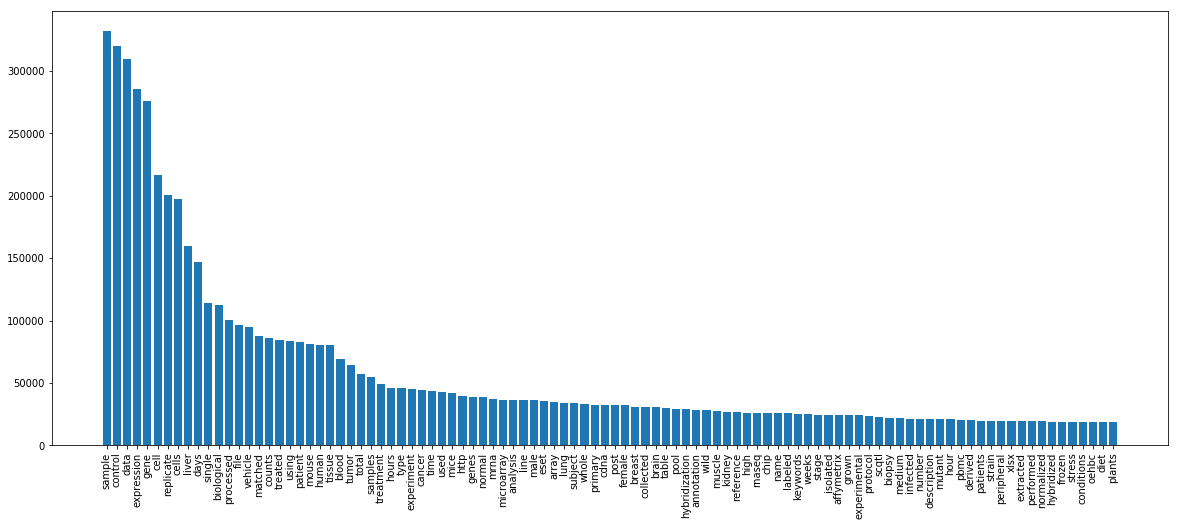

In [14]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(rotation='vertical')
plt.bar(list(sorted_d_300_more.keys())[:100], list(sorted_d_300_more.values())[:100])

plt.show()

#### Histogram : Top 100 words by frequency (Bin size 5000)

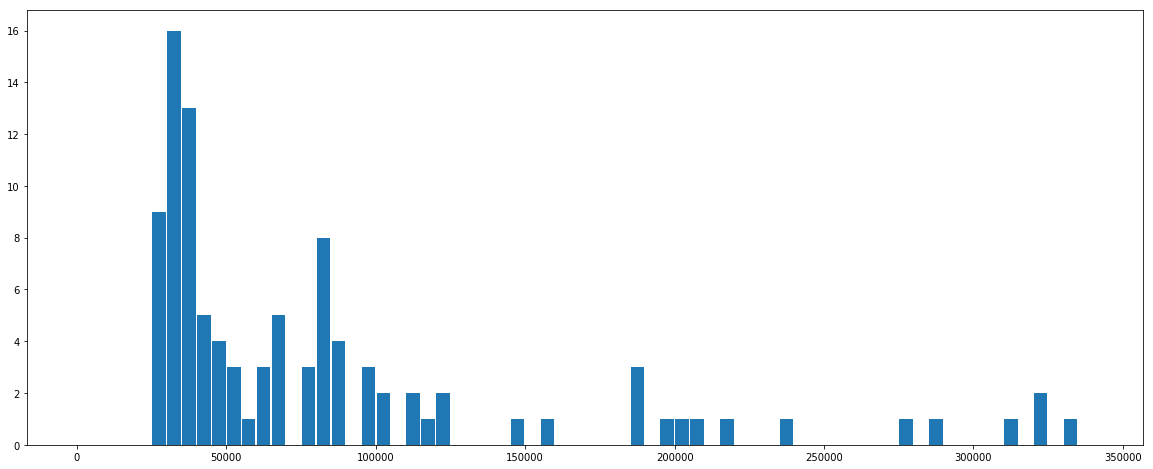

In [15]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
bins = [x*5000 for x in range(0,69)]
plt.hist(list(sorted_d_300.values())[:100], bins, rwidth=0.9)

plt.show()

#### Histogram : Top 100 words by frequency (Bin size 10000)

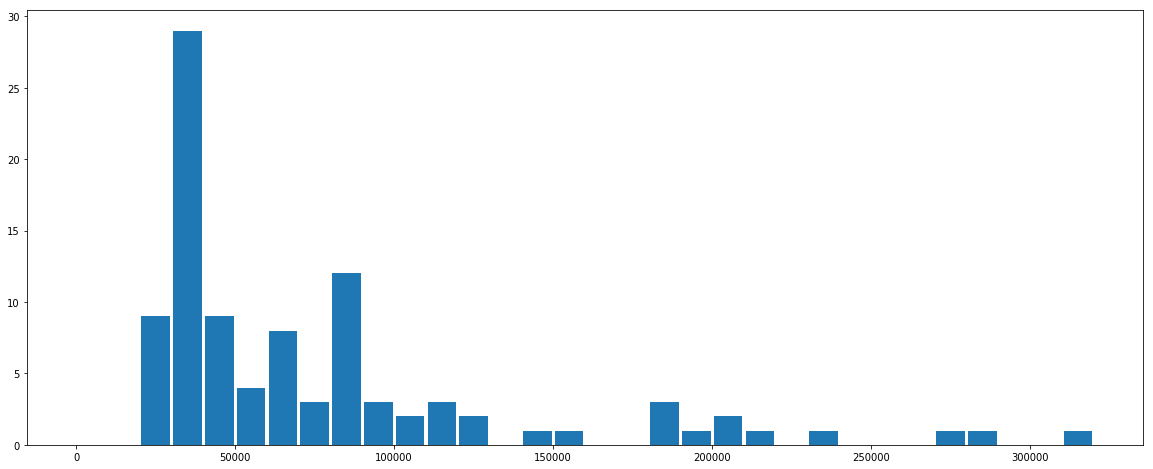

In [16]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
bins = [x*10000 for x in range(0,33)]
plt.hist(list(sorted_d_300.values())[:100], bins, rwidth=0.9)

plt.show()

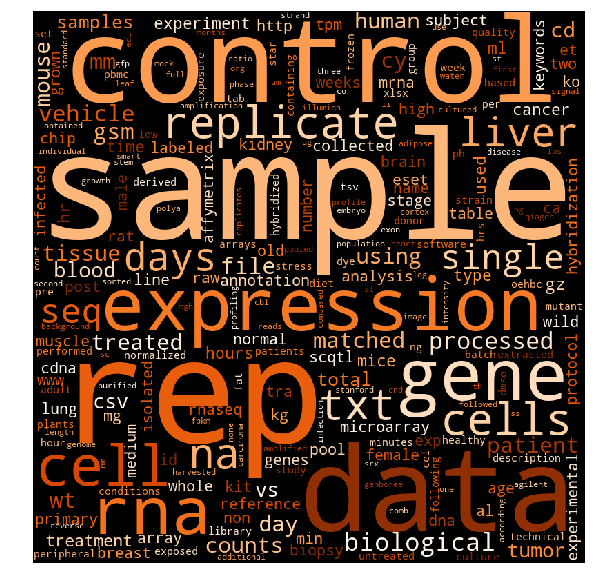

In [20]:
%matplotlib inline

stopwords = set(STOPWORDS) 

d_300 = dict((k, v) for k, v in d_300.items() if len(k)!=1)

# wordcloud = WordCloud().generate(total_string_labels) 
wordcloud =  WordCloud(width = 800, height = 800, 
                colormap="Oranges_r", max_words=250,
                min_font_size = 10).generate_from_frequencies(d_300)
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

plt.show()